## Gantt Charts and Timelines with plotly.express

In [3]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Resource="Alex"),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Resource="Alex"),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Resource="Max")
])

#fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Resource")
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
#fig.update_yaxes(autorange="reversed")
fig.show()

## Basic Gantt chart using Matplotlib

In [16]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [17]:

data = [    (dt.datetime(2018, 7, 17, 0, 15), dt.datetime(2018, 7, 17, 0, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 0, 30), dt.datetime(2018, 7, 17, 0, 45), 'eat'),
            (dt.datetime(2018, 7, 17, 0, 45), dt.datetime(2018, 7, 17, 1, 0), 'work'),
            (dt.datetime(2018, 7, 17, 1, 0), dt.datetime(2018, 7, 17, 1, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 1, 15), dt.datetime(2018, 7, 17, 1, 30), 'eat'), 
            (dt.datetime(2018, 7, 17, 1, 30), dt.datetime(2018, 7, 17, 1, 45), 'work')
        ]

cats = {"sleep" : 1, "eat" : 2, "work" : 3}
colormapping = {"sleep" : "C0", "eat" : "C1", "work" : "C2"}

verts = []
colors = []
for d in data:
    v =  [(mdates.date2num(d[0]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]-.4)]
    verts.append(v)
    colors.append(colormapping[d[2]])

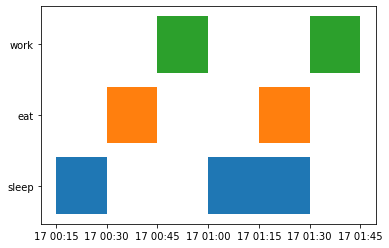

In [18]:

bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
loc = mdates.MinuteLocator(byminute=[0,15,30,45])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

ax.set_yticks([1,2,3])
ax.set_yticklabels(["sleep", "eat", "work"])
plt.show()